Apresentando o shape dos dados (dimenssoes)
(768, 9)

Desempenhos medios dos modelos:
Arvore: 0.682981 (0.069189)
ComiteArvore: 0.759144 (0.061110)
RedeNeural: 0.673784 (0.031501)
ComiteRede: 0.664376 (0.010411)

Different distributions (reject H0)

Comparison stats 11.322916865514964
Comparacao Arvore | ComiteArvore -> KruskalResult(statistic=4.834795763993936, pvalue=0.027890944255097888)
Comparacao Arvore | RedeNeural -> KruskalResult(statistic=0.11685649202733928, pvalue=0.7324692066914358)
Comparacao Arvore | CRNA -> KruskalResult(statistic=0.3755984555984601, pvalue=0.5399683333311465)
Comparacao ComiteArvore | RedeNeural -> KruskalResult(statistic=7.729083969465644, pvalue=0.005433831030135724)
Comparacao ComiteArvore | ComiteRede -> KruskalResult(statistic=9.009820732657822, pvalue=0.0026853275680207853)
Comparacao RedeNeural | ComiteRede -> KruskalResult(statistic=0.18798037612428908, pvalue=0.6646028754232635)

Acuracia Comite de Arvore: Treinamento 0.9791666666666666  Teste 

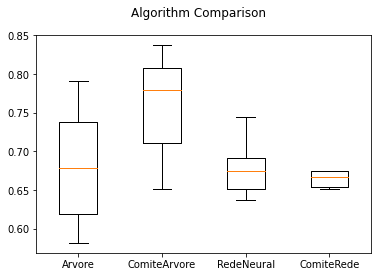

In [6]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
#from statsmodels.stats.contingency_tables import mcnemar

# prepare configuration for cross validation test harness
seed = 7

# load dataset

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv("pima-indians-diabetes.csv", names=names)
print("Apresentando o shape dos dados (dimenssoes)")
print(dataframe.shape)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=seed)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=seed)

#executo a busca com o gridsearch para encontrar os melhores parametros de cada modelo

# crio os modelos com os melhores parametros
RFC = RandomForestClassifier(n_estimators=10,random_state=seed)
DTC = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,5), random_state=seed)
BMLP = BaggingClassifier(base_estimator=MLP, n_estimators=10, random_state=seed)

#adiciono os modelos em uma lista
models = []
models.append(('Arvore', DTC))
models.append(('ComiteArvore', RFC))
models.append(('RedeNeural', MLP))
models.append(('ComiteRede', BMLP))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

#amostragem estratificada
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

#avaliacao de cada modelo nas amotragens estratificas
print('\nDesempenhos medios dos modelos:')
for name, model in models:
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Teste de hipotese analisando o p-value
stat, p = stats.kruskal(results[0],results[1],results[2],results[3])
alpha = 0.05
if p > alpha:
	print('\nSame distributions (fail to reject H0)')
else:
	print('\nDifferent distributions (reject H0)')
print('\nComparison stats', stat)

print('Comparacao Arvore | ComiteArvore ->', stats.kruskal(results[0],results[1]))
print('Comparacao Arvore | RedeNeural ->',stats.kruskal(results[0],results[2]))
print('Comparacao Arvore | CRNA ->',stats.kruskal(results[0],results[3]))
print('Comparacao ComiteArvore | RedeNeural ->',stats.kruskal(results[1],results[2]))
print('Comparacao ComiteArvore | ComiteRede ->',stats.kruskal(results[1],results[3]))
print('Comparacao RedeNeural | ComiteRede ->',stats.kruskal(results[2],results[3]))	

#realizo o treinamento dos modelos no conjunto de treinamento completo (sem divisao de validacao)
RFC.fit(X_train, y_train);
DTC.fit(X_train, y_train);
MLP.fit(X_train, y_train);
BMLP.fit(X_train, y_train);

#obtenho a predicao de cada modelo para a base de teste
Y_test_prediction_RFC = RFC.predict(X_test)
Y_test_prediction_DTC = DTC.predict(X_test)
Y_test_prediction_MLP = MLP.predict(X_test)
Y_test_prediction_BMLP = BMLP.predict(X_test)

print("\nAcuracia Comite de Arvore: Treinamento",  RFC.score(X_train, y_train)," Teste" ,RFC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_RFC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_RFC))

print("\nAcuracia Arvore: Treinamento",  DTC.score(X_train, y_train)," Teste" ,DTC.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_DTC))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_DTC))

print("\nAcuracia Rede Neural: Treinamento",  MLP.score(X_train, y_train)," Teste" ,MLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_MLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_MLP))

print("\nAcuracia Comite RNA: Treinamento",  BMLP.score(X_train, y_train)," Teste" ,BMLP.score(X_test, y_test))
print("Clasification report:", classification_report(y_test, Y_test_prediction_BMLP))
print("Confussion matrix:\n", confusion_matrix(y_test, Y_test_prediction_BMLP))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()	


In [5]:
# Significance stats tests
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare
from scipy.stats import kruskal
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Mann-Whitney Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = wilcoxon(data1, data2)
print('Wilcoxon Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = kruskal(data1, data2, data3)
print('Kruskal-Wallis Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

stat, p = friedmanchisquare(data1, data2, data3)
print('Friedman Statistic: s=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mann-Whitney Statistic: s=4597.000, p=0.163
Same distributions (fail to reject H0)
Wilcoxon Statistic: s=2314.000, p=0.468
Same distributions (fail to reject H0)
Kruskal-Wallis Statistic: s=6.051, p=0.049
Different distributions (reject H0)
Friedman Statistic: s=9.360, p=0.009
Different distributions (reject H0)
